# **Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import f
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Oversampling technique
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, make_scorer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

import xgboost as xgb

import warnings

# Ignore all runtime warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('fetal_health.csv')
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
data.shape

(2126, 22)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [6]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [7]:
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [8]:
features=list(data.drop(columns=['fetal_health']).columns)
features

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_number_of_zeroes',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance',
 'histogram_tendency']

## **Basic EDA**

In [9]:
data['fetal_health'].value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

In [10]:
X=data[features]
y=data['fetal_health']

In [11]:
X

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0


In [12]:

y

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: float64

### **Correlation and Multicollinearity**

**Correlation Plot**

<Axes: >

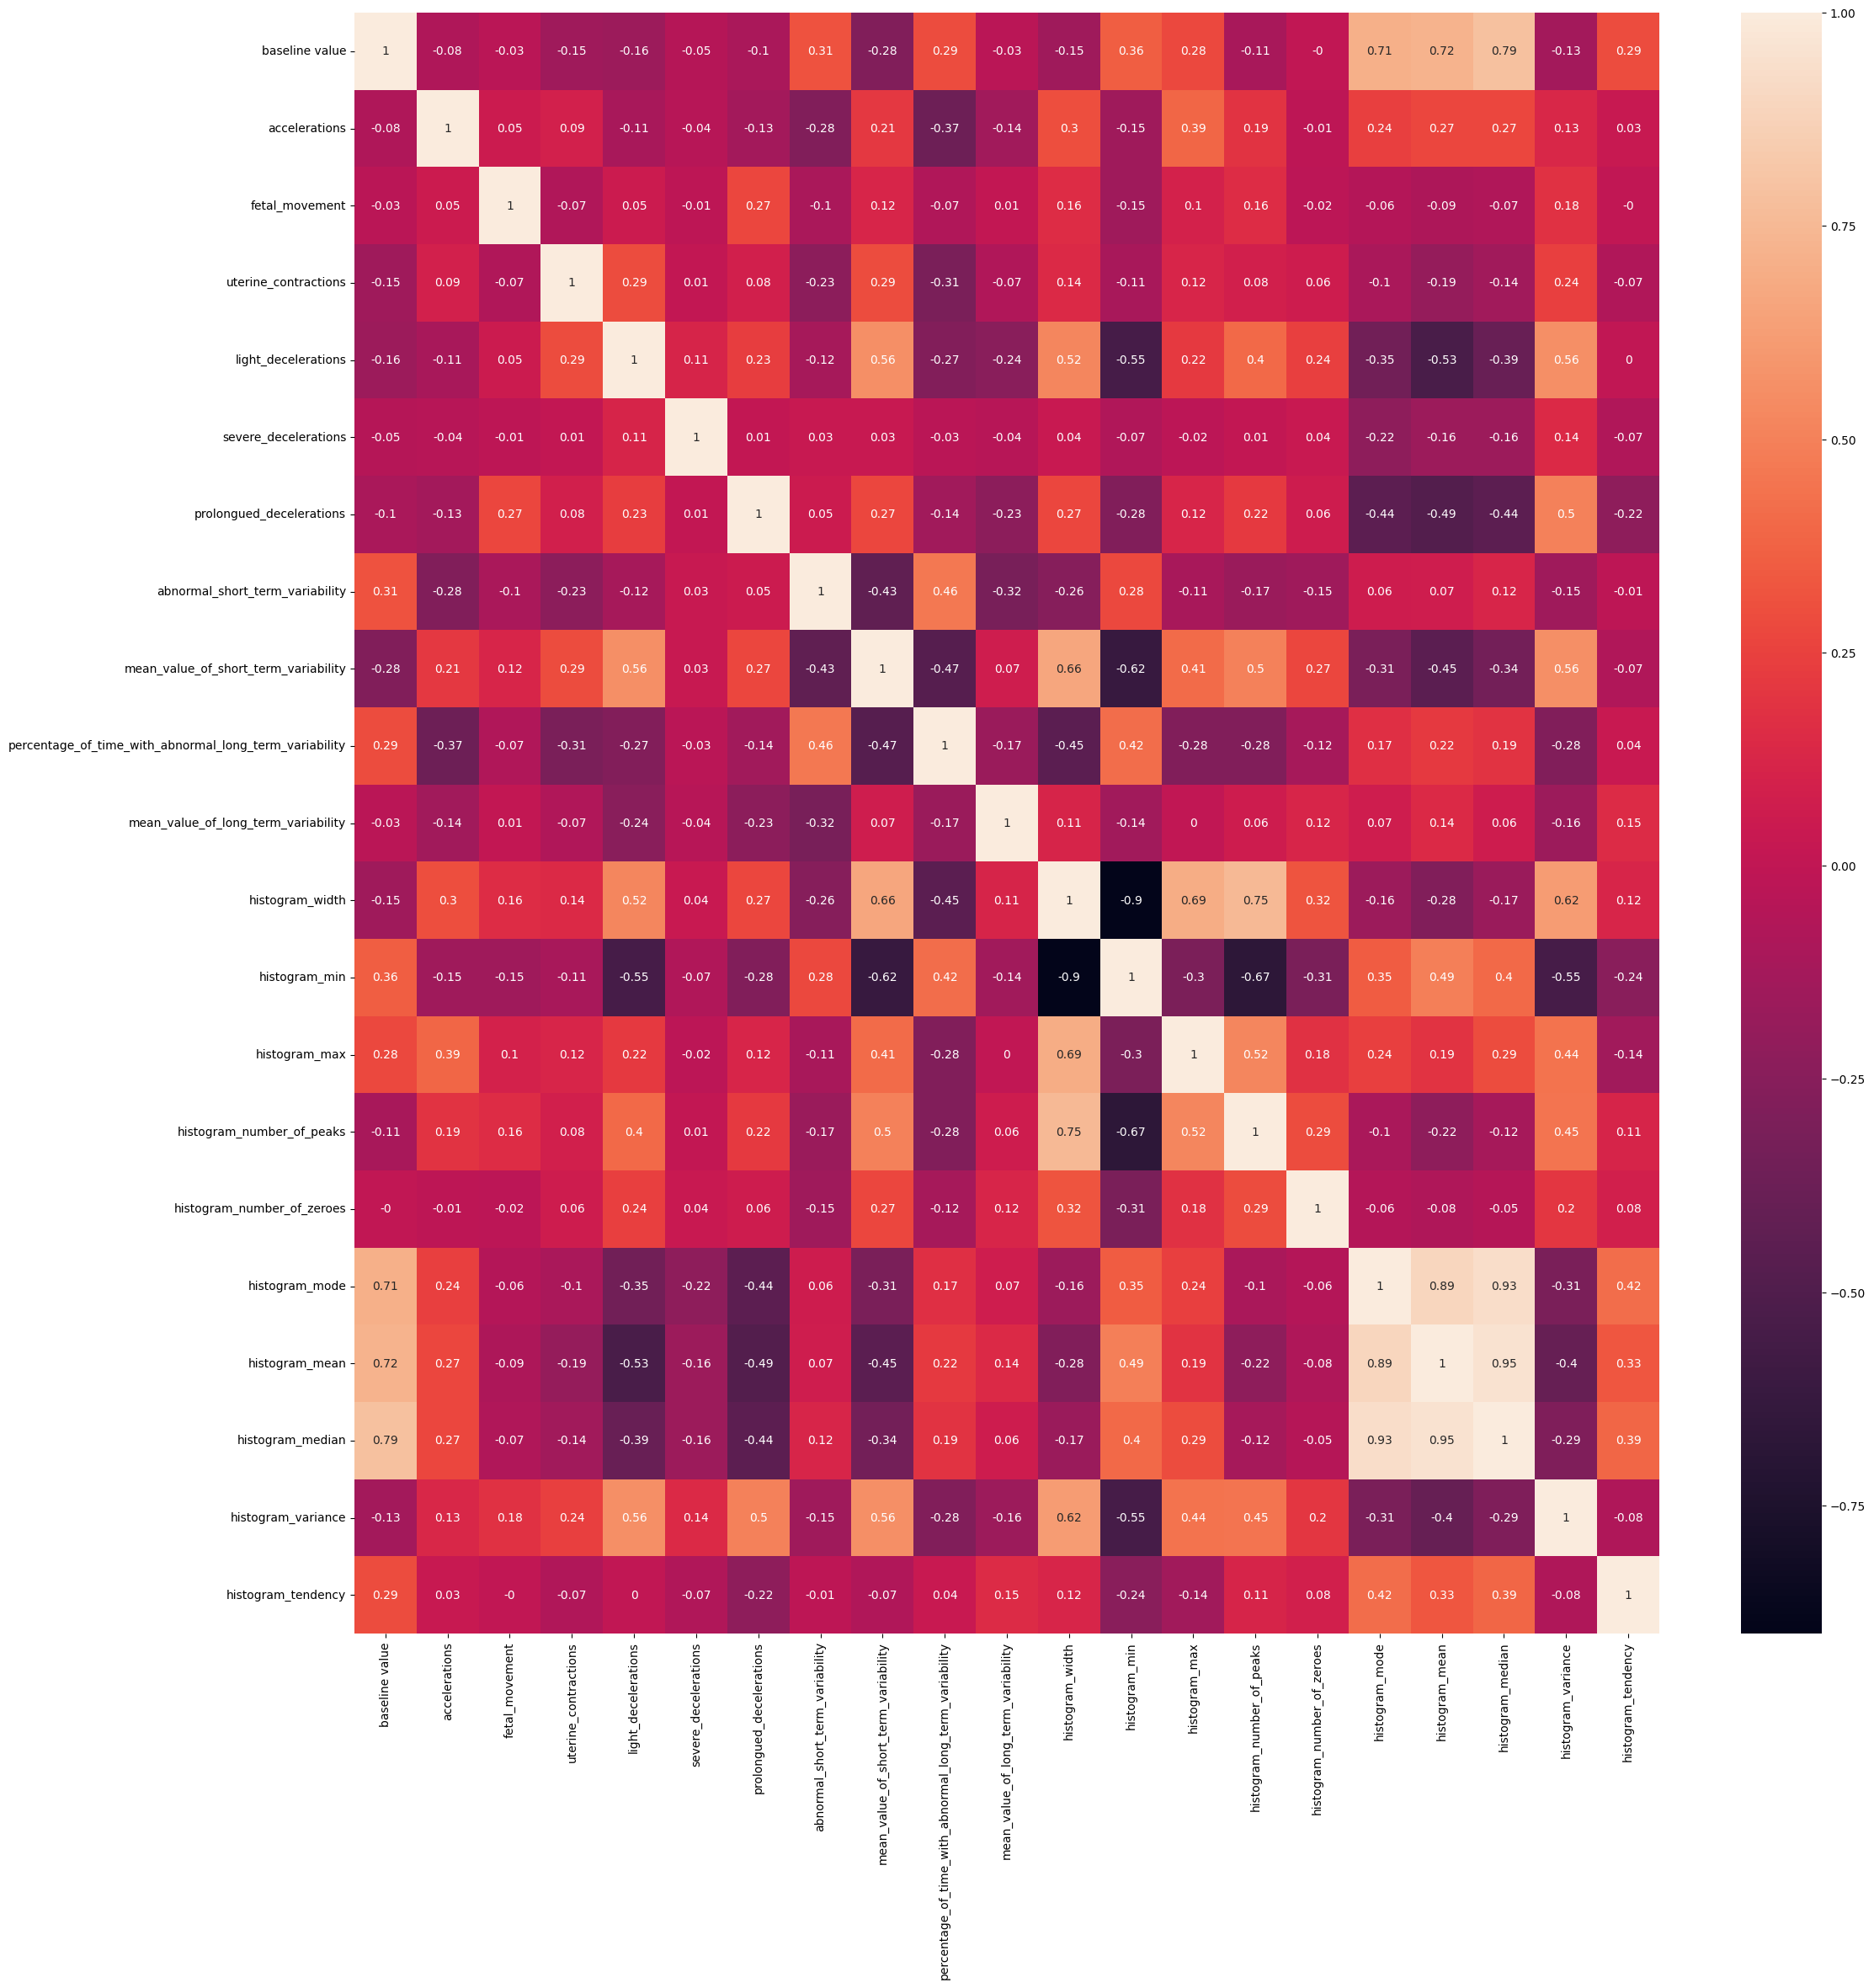

In [13]:
correlation_matrix=X.corr().round(2)
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True)

 **Multicollinearity test using variance inflation factor(VIF)**

In [14]:
vif_data = pd.DataFrame()
temp=X[features]
vif_data["feature"] = temp.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(temp.values, i)
                          for i in range(len(temp.columns))]

print(vif_data)

                                              feature          VIF
0                                      baseline value  1058.823853
1                                       accelerations     4.801485
2                                      fetal_movement     1.184827
3                                uterine_contractions     4.034365
4                                 light_decelerations     4.799432
5                                severe_decelerations     1.136294
6                            prolongued_decelerations     2.926905
7                     abnormal_short_term_variability    16.051631
8                mean_value_of_short_term_variability     9.457023
9   percentage_of_time_with_abnormal_long_term_var...     2.417343
10                mean_value_of_long_term_variability     6.309741
11                                    histogram_width          inf
12                                      histogram_min          inf
13                                      histogram_max         

VIF values less than 5 typically indicate low multicollinearity, and values below 10 are generally considered acceptable. Looking at your VIF values:

Features with VIF greater than 10:


*   Baseline value


*   Abnormal short term variability

*   Mean value of short term variability
*   Histogram mode


*   Histogram mean


*   Histogram median





## **Univariate Analysis**

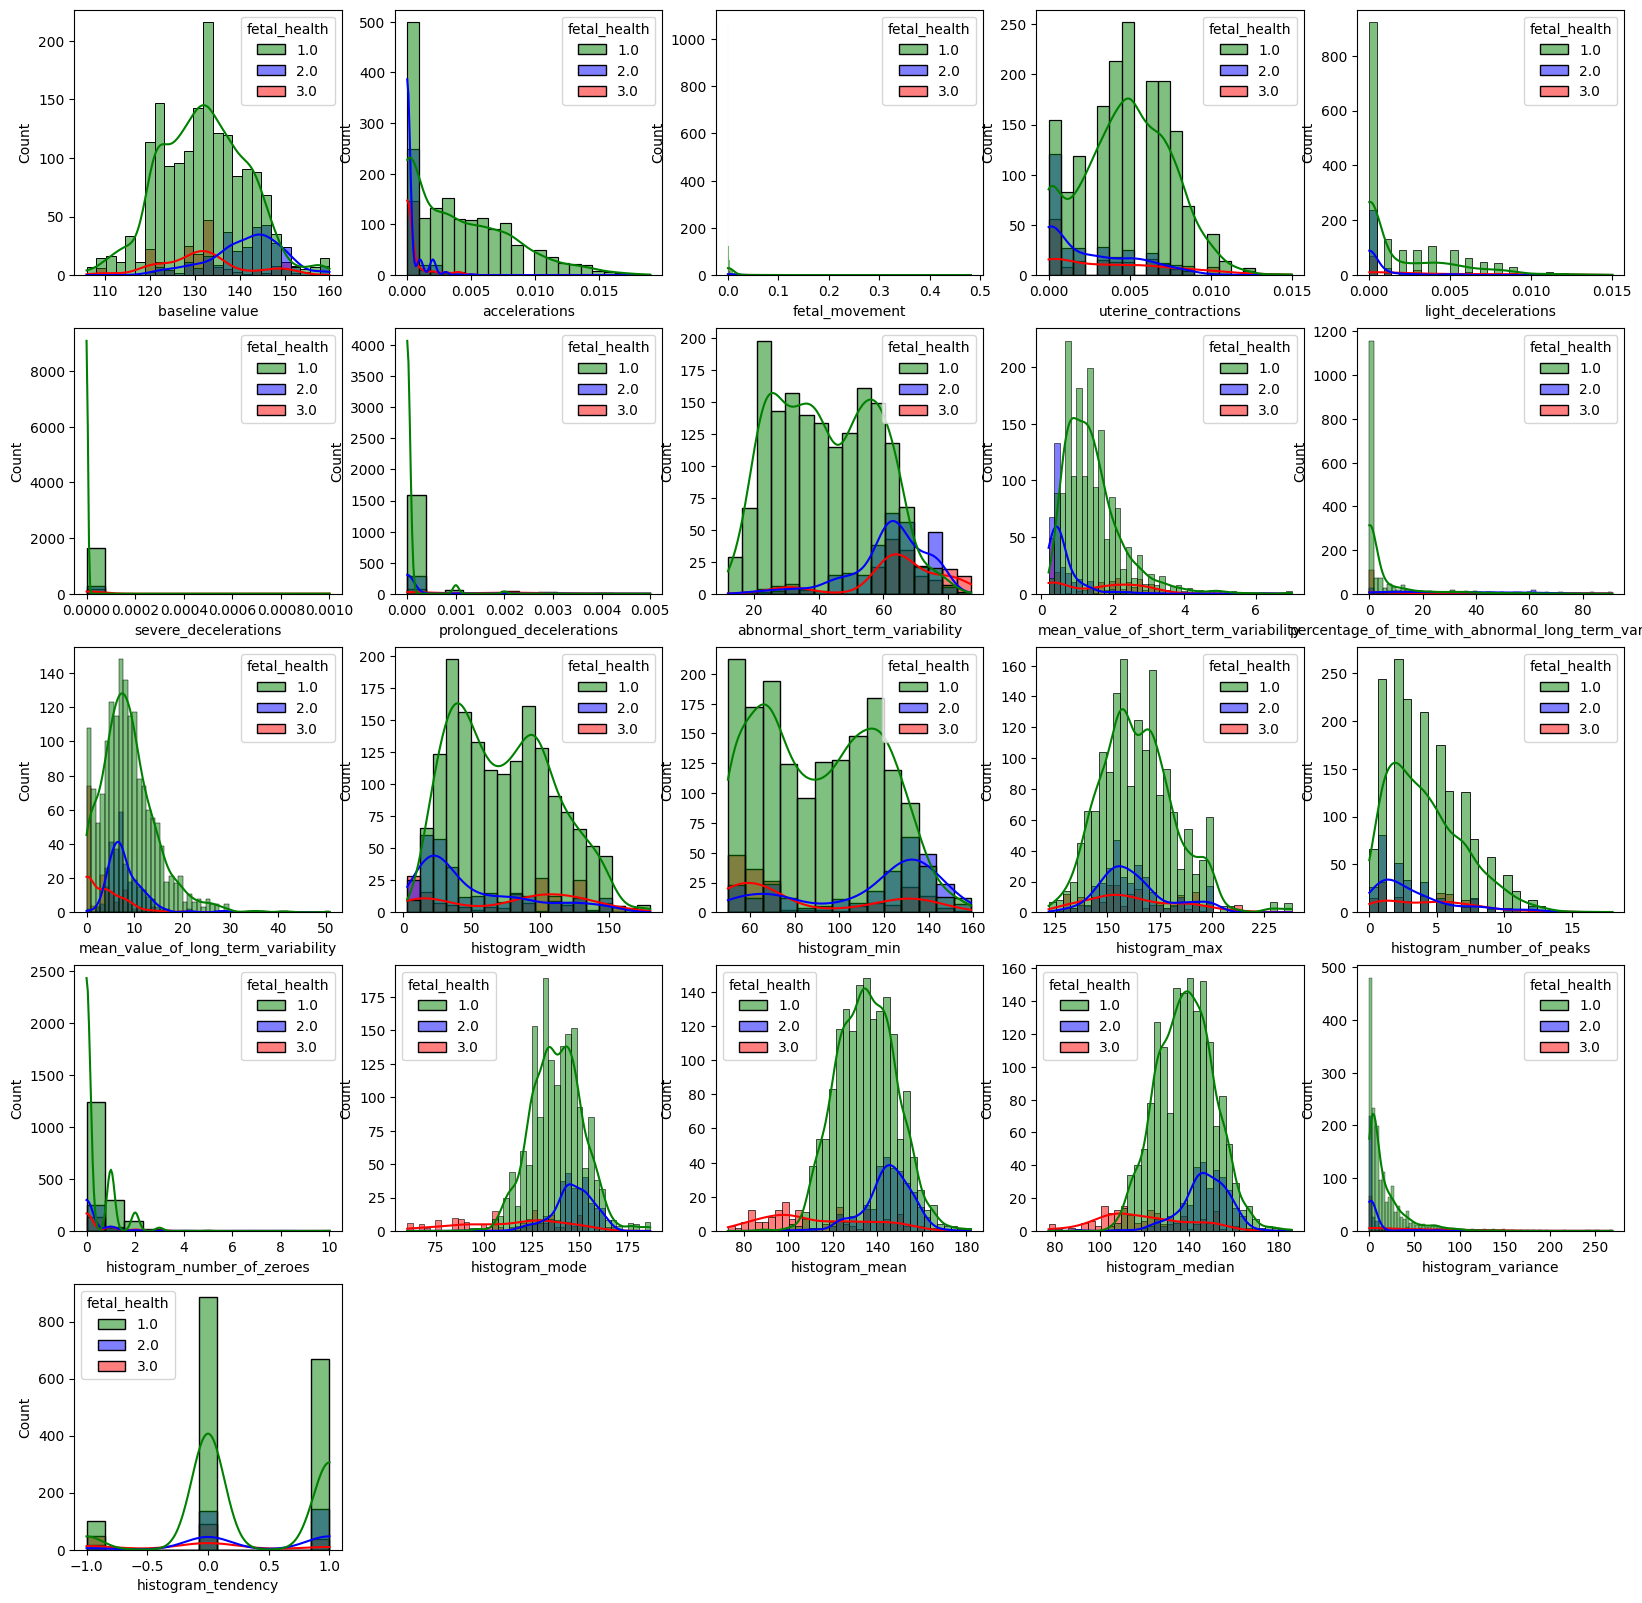

In [15]:
l=len(features)
plt.figure(figsize=(20,20))
for i in range(l):
  plt.subplot(l//4,5,i+1)
  sns.histplot(data=data,x=features[i],kde=True,hue='fetal_health',palette={1:'green',2:'blue',3:'red'})

## **Bivariate Analysis**

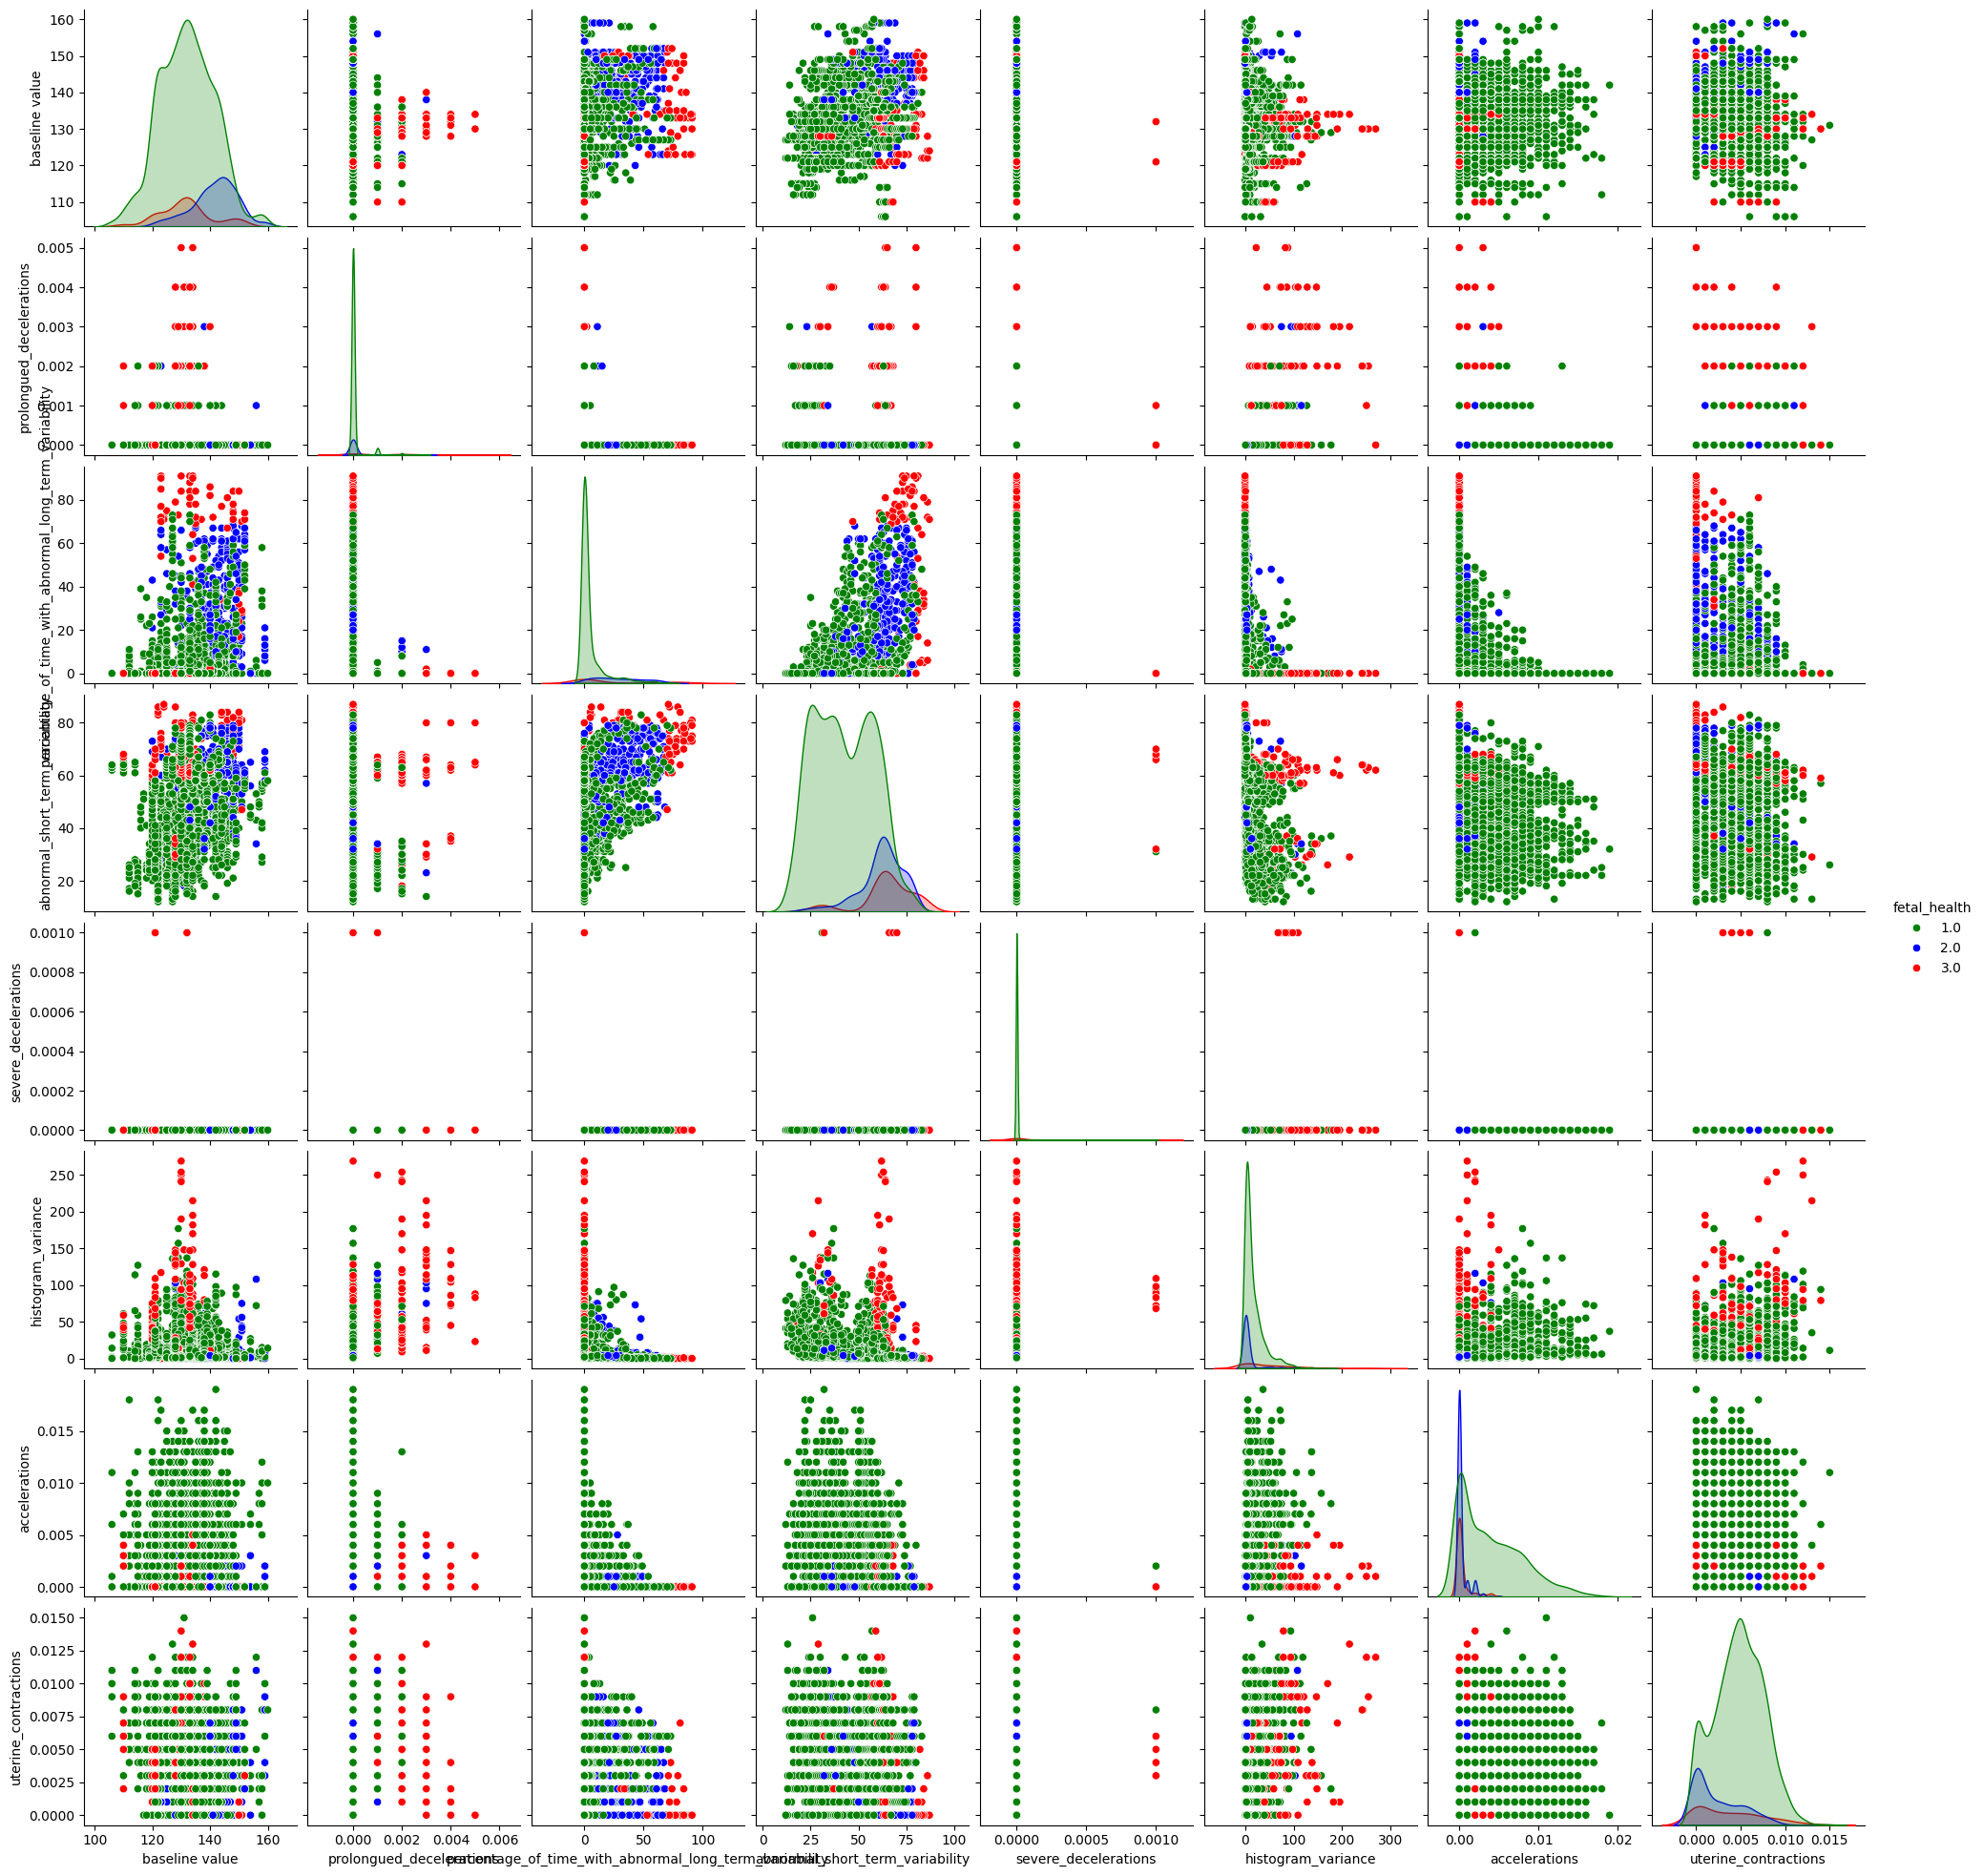

In [16]:
sns.pairplot(data=data[['baseline value','prolongued_decelerations','percentage_of_time_with_abnormal_long_term_variability','abnormal_short_term_variability','severe_decelerations','histogram_variance','accelerations','uterine_contractions','fetal_health']],hue='fetal_health',palette={1:'green',2:'blue',3:'red'})

## **Feature Scaling**

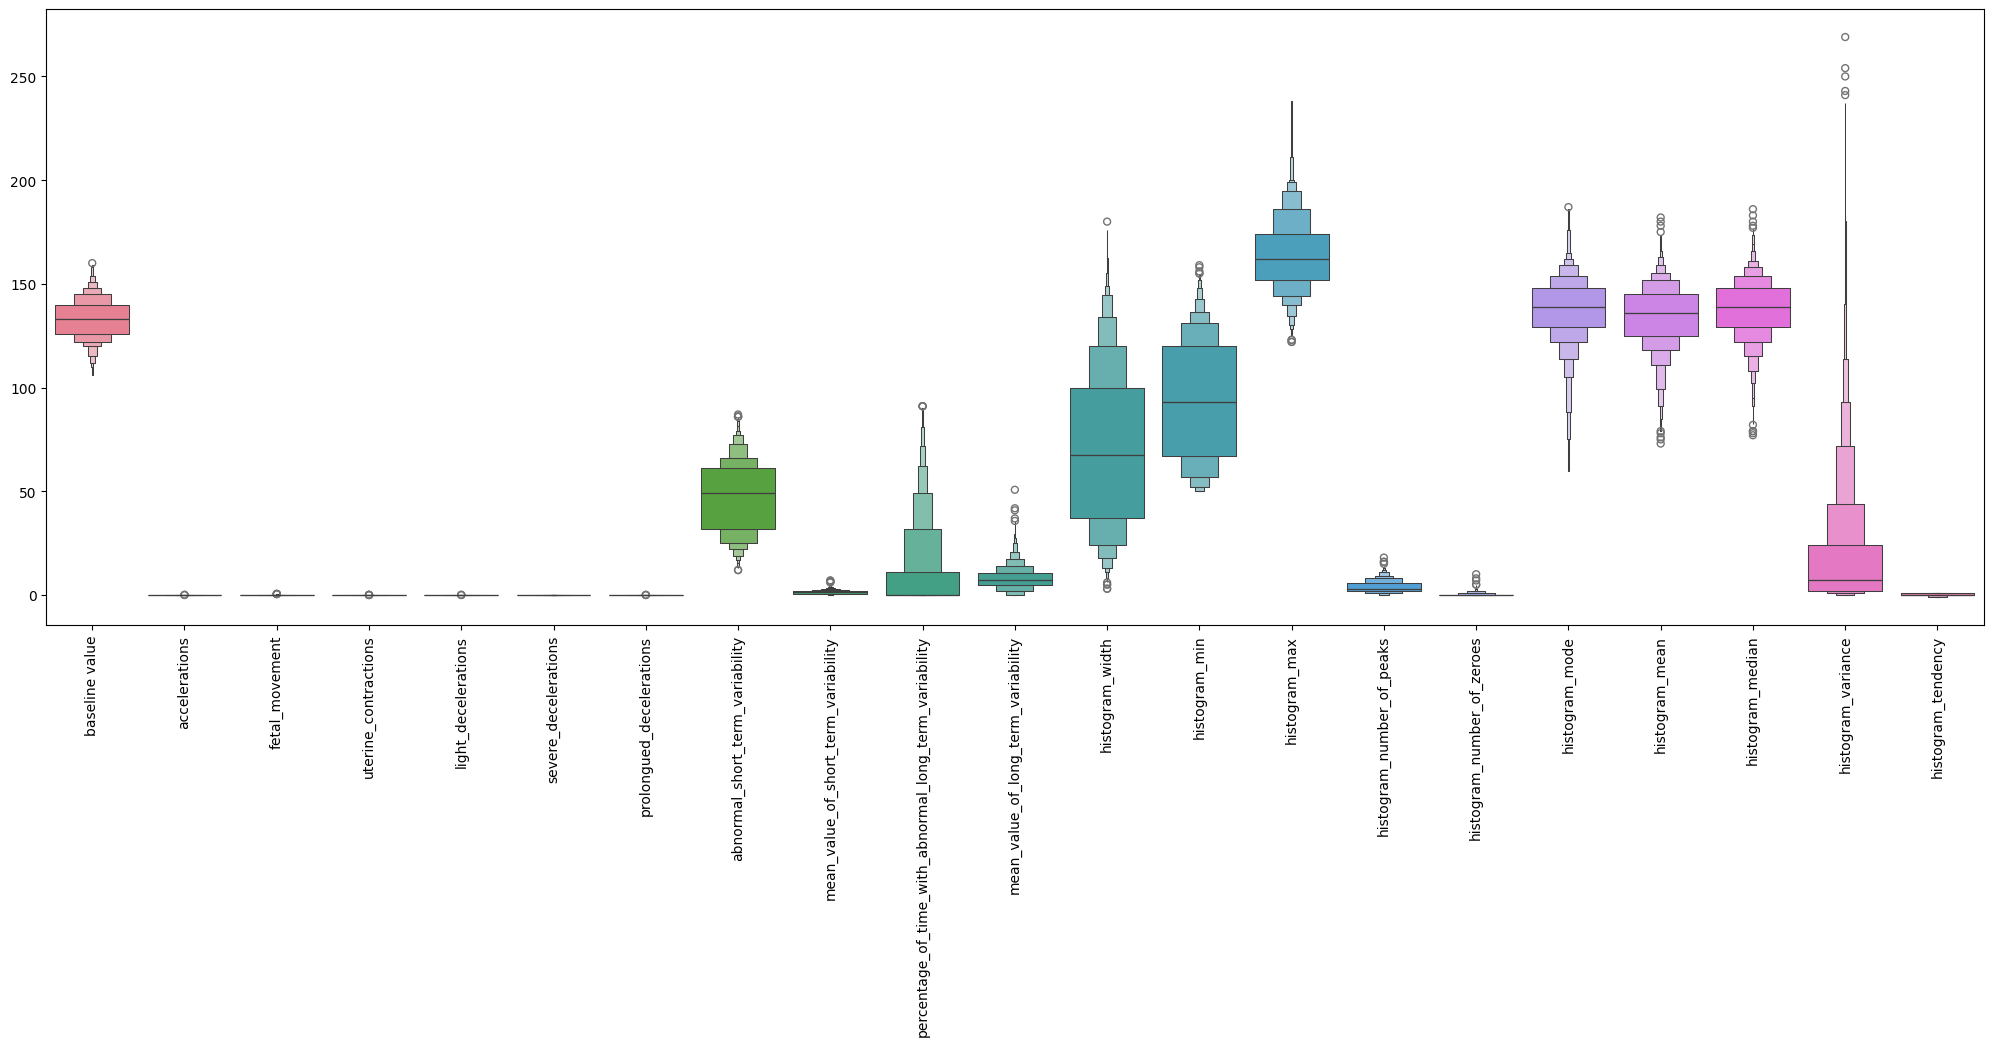

In [17]:
plt.figure(figsize=(25,8))
sns.boxenplot(data=X)
plt.xticks(rotation=90)
plt.show()

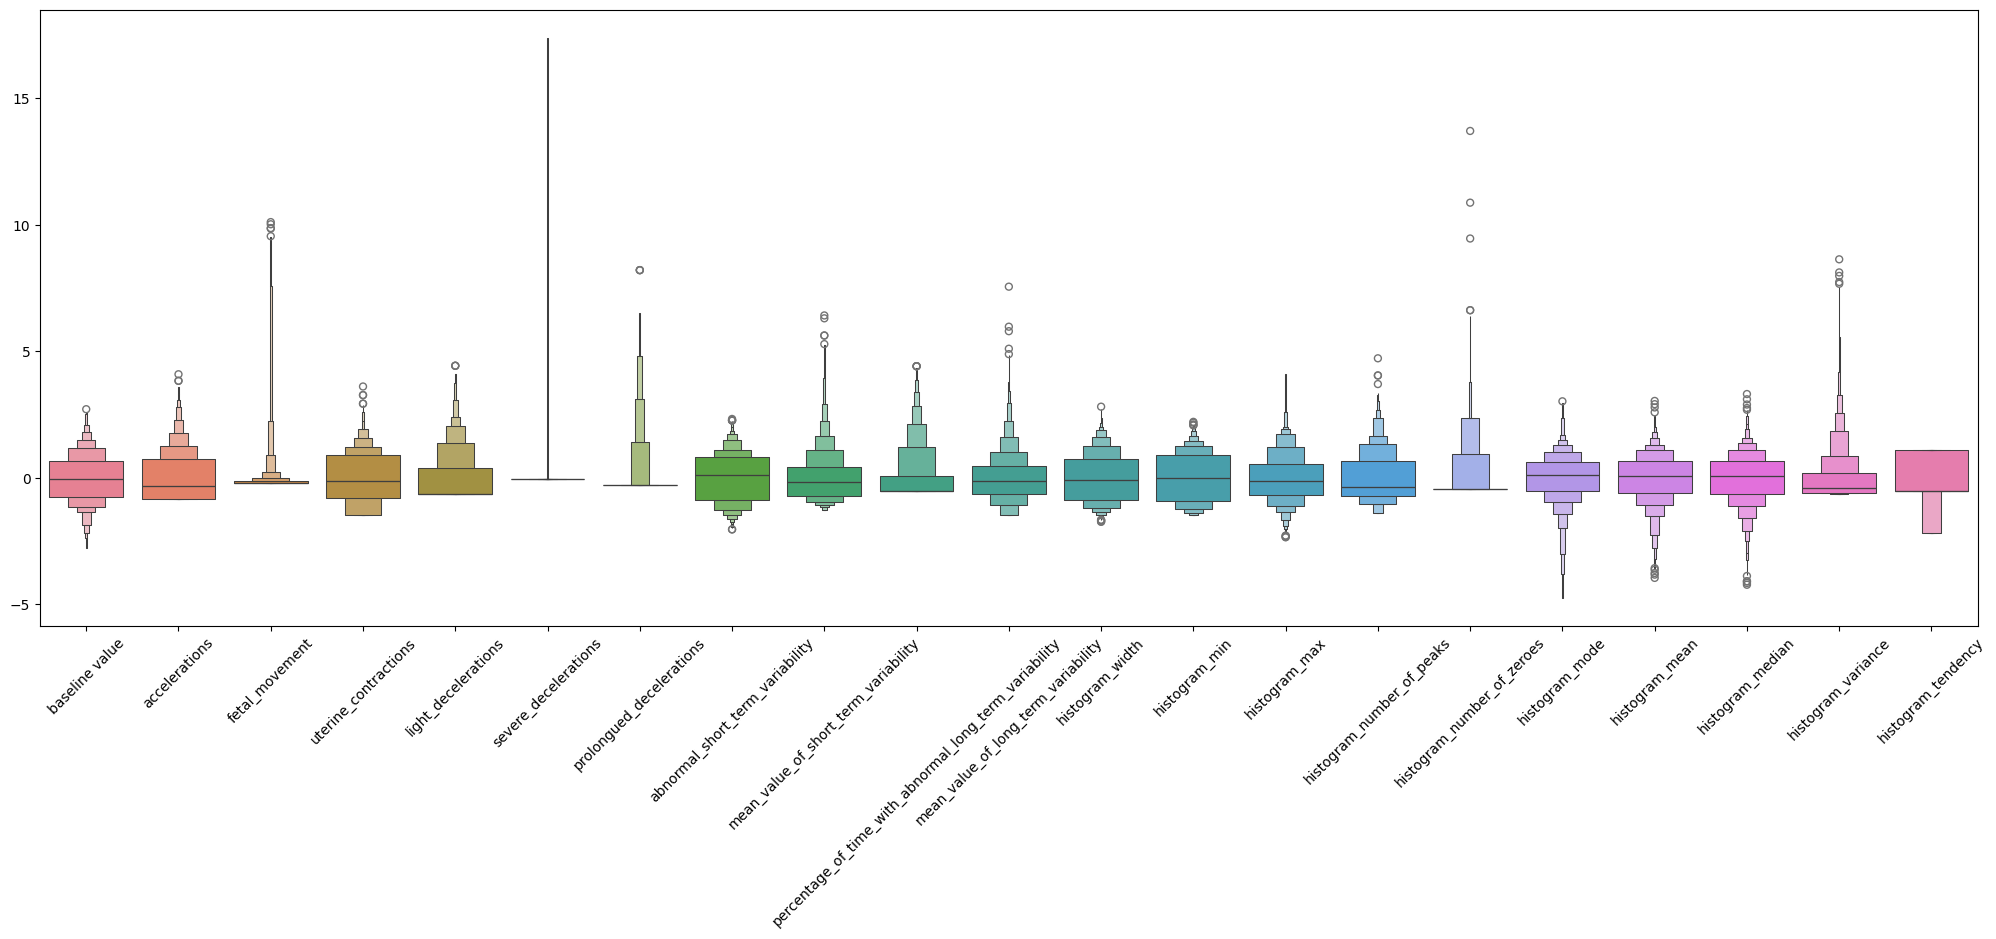

In [18]:
sc=StandardScaler().fit_transform(X)
X_scaled=pd.DataFrame(sc,columns=list(X.columns))

plt.figure(figsize=(25,8))
sns.boxenplot(data=X_scaled)
plt.xticks(rotation=45)
plt.show()

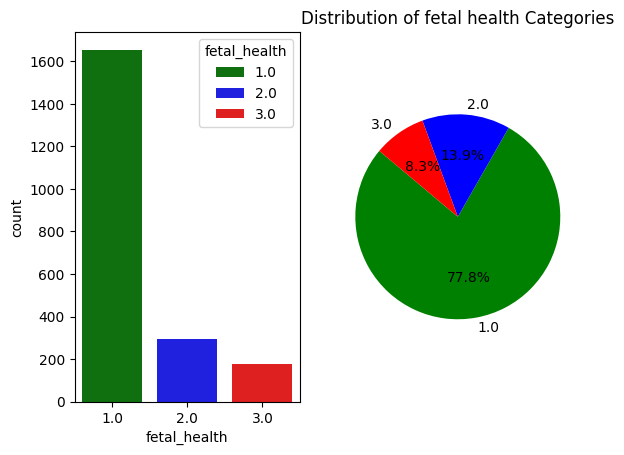

In [19]:
plt.subplot(1,2,1)
sns.countplot(data=data,x='fetal_health',hue='fetal_health',palette={1:'green',2:'blue',3:'red'})

target_counts = data['fetal_health'].value_counts()

# Create pie chart
plt.subplot(1,2,2)
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140,colors=[ 'green', 'blue', 'red'] )
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of fetal health Categories')
plt.show()

## Oversampling - SMOTE

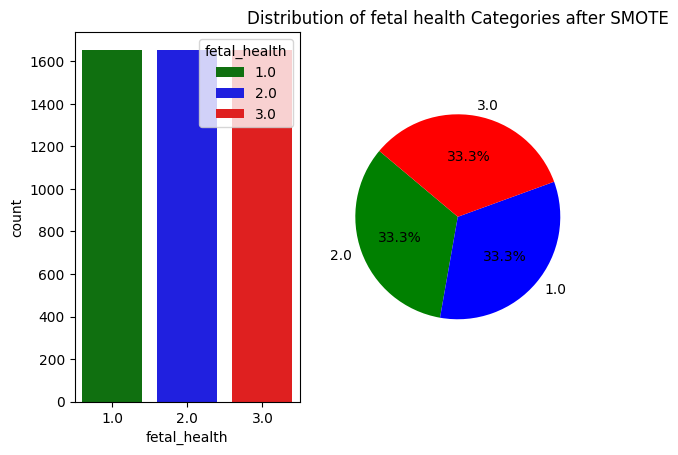

In [20]:
# Initialize SMOTE
smote = SMOTE()

# Apply SMOTE only on training data
X_smote, y_smote = smote.fit_resample(X, y)
target_counts = y_smote.value_counts()

plt.subplot(1,2,1)
sns.countplot(x=y_smote,hue=y_smote,palette={1:'green',2:'blue',3:'red'})
plt.subplot(1,2,2)
# Create pie chart
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140,colors=[ 'green', 'blue', 'red'] )
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of fetal health Categories after SMOTE')
plt.show()

In [24]:
models=[]
model_precision = {1: [], 2: [], 3: []}
model_recall = {1: [], 2: [], 3: []}
model_f1_score = {1: [], 2: [], 3: []}

train_models=[]
train_model_precision = {1: [], 2: [], 3: []}
train_model_recall = {1: [], 2: [], 3: []}
train_model_f1_score = {1: [], 2: [], 3: []}

## Logistic Regression

In [25]:
# Assuming you have your features in X and labels in y as numpy arrays

# Define the number of splits for cross-validation
n_splits = 5
# Initialize Stratified KFold
skf = StratifiedKFold(n_splits=n_splits, shuffle = True, random_state=42)


# Initialize SMOTE
smote = SMOTE()

# Initialize StandardScaler
scaler = StandardScaler()

X_ = X.values
y_np = y.values
y_ = y_np.astype(int)

# Initialize lists to store metrics
accuracies = []
precisions = {1: [], 2: [], 3: []}
recalls = {1: [], 2: [], 3: []}
f1_scores = {1: [], 2: [], 3: []}

train_accuracies = []
train_precisions = {1: [], 2: [], 3: []}
train_recalls = {1: [], 2: [], 3: []}
train_f1_scores = {1: [], 2: [], 3: []}

# Perform cross-validation
for train_index, test_index in skf.split(X_, y_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]

    # Apply StandardScaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply SMOTE only on training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

    log_reg = LogisticRegression(max_iter=1000)

# Train your classifier
    log_reg.fit(X_train_resampled, y_train_resampled)

    y_pred = log_reg.predict(X_test_scaled)
    y_pred_train = log_reg.predict(X_train_resampled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
    accuracies.append(accuracy)
    train_accuracies.append(accuracy_train)

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, labels=[1, 2, 3])
    for i in range(1, 4):
        precisions[i].append(precision[i-1])
        recalls[i].append(recall[i-1])
        f1_scores[i].append(f1_score[i-1])

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_train_resampled, y_pred_train, labels=[1, 2, 3])
    for i in range(1, 4):
        train_precisions[i].append(precision[i-1])
        train_recalls[i].append(recall[i-1])
        train_f1_scores[i].append(f1_score[i-1])


# Calculate and print the average metrics for each class
avg_accuracy = np.mean(accuracies)
train_avg_accuracy = np.mean(train_accuracies)
print("Average Accuracy:", avg_accuracy)
models.append('Logistic Regression')
train_models.append('Logistic Regression')
for i in range(1, 4):
    avg_precision = np.mean(precisions[i])
    avg_recall = np.mean(recalls[i])
    avg_f1_score = np.mean(f1_scores[i])

    train_avg_precision = np.mean(train_precisions[i])
    train_avg_recall = np.mean(train_recalls[i])
    train_avg_f1_score = np.mean(train_f1_scores[i])

    print(f"\nMetrics for Class {i}:")
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1 Score:", avg_f1_score)
    model_precision[i].append(avg_precision)
    model_recall[i].append(avg_recall)
    model_f1_score[i].append(avg_f1_score)
    train_model_precision[i].append(train_avg_precision)
    train_model_recall[i].append(train_avg_recall)
    train_model_f1_score[i].append(train_avg_f1_score)

Average Accuracy: 0.8692460646230323

Metrics for Class 1:
Average Precision: 0.9820505571484291
Average Recall: 0.8851963746223565
Average F1 Score: 0.9309604752867289

Metrics for Class 2:
Average Precision: 0.5618094982094558
Average Recall: 0.8067796610169491
Average F1 Score: 0.6616737912497166

Metrics for Class 3:
Average Precision: 0.7003801210866427
Average Recall: 0.8239682539682539
Average F1 Score: 0.7540156361051884


### SVM Linear Kernel

In [26]:
# Assuming you have your features in X and labels in y as numpy arrays

# Define the number of splits for cross-validation
n_splits = 10
# Initialize Stratified KFold
skf = StratifiedKFold(n_splits=n_splits, shuffle = True, random_state=42)


# Initialize SMOTE
smote = SMOTE()

# Initialize StandardScaler
scaler = StandardScaler()

X_ = X.values
y_np = y.values
y_ = y_np.astype(int)

# Initialize lists to store metrics
accuracies = []
precisions = {1: [], 2: [], 3: []}
recalls = {1: [], 2: [], 3: []}
f1_scores = {1: [], 2: [], 3: []}

train_accuracies = []
train_precisions = {1: [], 2: [], 3: []}
train_recalls = {1: [], 2: [], 3: []}
train_f1_scores = {1: [], 2: [], 3: []}

# Perform cross-validation
for train_index, test_index in skf.split(X_, y_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]

    # Apply StandardScaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply SMOTE only on training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

    svm = SVC(kernel="linear")

# Train your classifier
    svm.fit(X_train_resampled, y_train_resampled)

    y_pred = svm.predict(X_test_scaled)
    y_pred_train = svm.predict(X_train_resampled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
    accuracies.append(accuracy)
    train_accuracies.append(accuracy_train)

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, labels=[1, 2, 3])
    for i in range(1, 4):
        precisions[i].append(precision[i-1])
        recalls[i].append(recall[i-1])
        f1_scores[i].append(f1_score[i-1])

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_train_resampled, y_pred_train, labels=[1, 2, 3])
    for i in range(1, 4):
        train_precisions[i].append(precision[i-1])
        train_recalls[i].append(recall[i-1])
        train_f1_scores[i].append(f1_score[i-1])


# Calculate and print the average metrics for each class
avg_accuracy = np.mean(accuracies)
train_avg_accuracy = np.mean(train_accuracies)
print("Average Accuracy:", avg_accuracy)
models.append('SVM Linear Kernel')
train_models.append('SVM Linear Kernel')
for i in range(1, 4):
    avg_precision = np.mean(precisions[i])
    avg_recall = np.mean(recalls[i])
    avg_f1_score = np.mean(f1_scores[i])

    train_avg_precision = np.mean(train_precisions[i])
    train_avg_recall = np.mean(train_recalls[i])
    train_avg_f1_score = np.mean(train_f1_scores[i])

    print(f"\nMetrics for Class {i}:")
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1 Score:", avg_f1_score)
    model_precision[i].append(avg_precision)
    model_recall[i].append(avg_recall)
    model_f1_score[i].append(avg_f1_score)
    train_model_precision[i].append(train_avg_precision)
    train_model_recall[i].append(train_avg_recall)
    train_model_f1_score[i].append(train_avg_f1_score)

Average Accuracy: 0.8739591637877581

Metrics for Class 1:
Average Precision: 0.9833359998981004
Average Recall: 0.8875575027382256
Average F1 Score: 0.9327097129676172

Metrics for Class 2:
Average Precision: 0.5784975802667899
Average Recall: 0.8165517241379311
Average F1 Score: 0.6733768149449738

Metrics for Class 3:
Average Precision: 0.7238074996898527
Average Recall: 0.8415032679738562
Average F1 Score: 0.7715898118968895


### SVM RBF kernel

In [27]:
# Assuming you have your features in X and labels in y as numpy arrays

# Define the number of splits for cross-validation
n_splits = 10
# Initialize Stratified KFold
skf = StratifiedKFold(n_splits=n_splits, shuffle = True, random_state=42)


# Initialize SMOTE
smote = SMOTE()

# Initialize StandardScaler
scaler = StandardScaler()

X_ = X.values
y_np = y.values
y_ = y_np.astype(int)

# Initialize lists to store metrics
accuracies = []
precisions = {1: [], 2: [], 3: []}
recalls = {1: [], 2: [], 3: []}
f1_scores = {1: [], 2: [], 3: []}

train_accuracies = []
train_precisions = {1: [], 2: [], 3: []}
train_recalls = {1: [], 2: [], 3: []}
train_f1_scores = {1: [], 2: [], 3: []}

# Perform cross-validation
for train_index, test_index in skf.split(X_, y_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]

    # Apply StandardScaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply SMOTE only on training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

    svm = SVC(kernel="rbf")

# Train your classifier
    svm.fit(X_train_resampled, y_train_resampled)

    y_pred = svm.predict(X_test_scaled)
    y_pred_train = svm.predict(X_train_resampled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
    accuracies.append(accuracy)
    train_accuracies.append(accuracy_train)

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, labels=[1, 2, 3])
    for i in range(1, 4):
        precisions[i].append(precision[i-1])
        recalls[i].append(recall[i-1])
        f1_scores[i].append(f1_score[i-1])

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_train_resampled, y_pred_train, labels=[1, 2, 3])
    for i in range(1, 4):
        train_precisions[i].append(precision[i-1])
        train_recalls[i].append(recall[i-1])
        train_f1_scores[i].append(f1_score[i-1])


# Calculate and print the average metrics for each class
avg_accuracy = np.mean(accuracies)
train_avg_accuracy = np.mean(train_accuracies)
print("Average Accuracy:", avg_accuracy)
models.append('SVM RBF Kernel')
train_models.append('SVM RBF Kernel')
for i in range(1, 4):
    avg_precision = np.mean(precisions[i])
    avg_recall = np.mean(recalls[i])
    avg_f1_score = np.mean(f1_scores[i])

    train_avg_precision = np.mean(train_precisions[i])
    train_avg_recall = np.mean(train_recalls[i])
    train_avg_f1_score = np.mean(train_f1_scores[i])

    print(f"\nMetrics for Class {i}:")
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1 Score:", avg_f1_score)
    model_precision[i].append(avg_precision)
    model_recall[i].append(avg_recall)
    model_f1_score[i].append(avg_f1_score)
    train_model_precision[i].append(train_avg_precision)
    train_model_recall[i].append(train_avg_recall)
    train_model_f1_score[i].append(train_avg_f1_score)

Average Accuracy: 0.8909092922313757

Metrics for Class 1:
Average Precision: 0.9855338397167308
Average Recall: 0.8953997809419498
Average F1 Score: 0.937901227734091

Metrics for Class 2:
Average Precision: 0.5969661283701556
Average Recall: 0.8814942528735632
Average F1 Score: 0.7100227888053975

Metrics for Class 3:
Average Precision: 0.8462562656641606
Average Recall: 0.8647058823529413
Average F1 Score: 0.8518018916045232


### KNN

In [28]:
# Assuming you have your features in X and labels in y as numpy arrays

# Define the number of splits for cross-validation
n_splits = 10
# Initialize Stratified KFold
skf = StratifiedKFold(n_splits=n_splits, shuffle = True, random_state=42)


# Initialize SMOTE
smote = SMOTE()

# Initialize StandardScaler
scaler = StandardScaler()

X_ = X.values
y_np = y.values
y_ = y_np.astype(int)

# Initialize lists to store metrics
accuracies = []
precisions = {1: [], 2: [], 3: []}
recalls = {1: [], 2: [], 3: []}
f1_scores = {1: [], 2: [], 3: []}

train_accuracies = []
train_precisions = {1: [], 2: [], 3: []}
train_recalls = {1: [], 2: [], 3: []}
train_f1_scores = {1: [], 2: [], 3: []}

# Perform cross-validation
for train_index, test_index in skf.split(X_, y_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]

    # Apply StandardScaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply SMOTE only on training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

    knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train your classifier
    knn.fit(X_train_resampled, y_train_resampled)

    y_pred = knn.predict(X_test_scaled)
    y_pred_train = knn.predict(X_train_resampled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
    accuracies.append(accuracy)
    train_accuracies.append(accuracy_train)

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, labels=[1, 2, 3])
    for i in range(1, 4):
        precisions[i].append(precision[i-1])
        recalls[i].append(recall[i-1])
        f1_scores[i].append(f1_score[i-1])

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_train_resampled, y_pred_train, labels=[1, 2, 3])
    for i in range(1, 4):
        train_precisions[i].append(precision[i-1])
        train_recalls[i].append(recall[i-1])
        train_f1_scores[i].append(f1_score[i-1])


# Calculate and print the average metrics for each class
avg_accuracy = np.mean(accuracies)
train_avg_accuracy = np.mean(train_accuracies)
print("Average Accuracy:", avg_accuracy)
models.append('KNN')
train_models.append('KNN')
for i in range(1, 4):
    avg_precision = np.mean(precisions[i])
    avg_recall = np.mean(recalls[i])
    avg_f1_score = np.mean(f1_scores[i])

    train_avg_precision = np.mean(train_precisions[i])
    train_avg_recall = np.mean(train_recalls[i])
    train_avg_f1_score = np.mean(train_f1_scores[i])

    print(f"\nMetrics for Class {i}:")
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1 Score:", avg_f1_score)
    model_precision[i].append(avg_precision)
    model_recall[i].append(avg_recall)
    model_f1_score[i].append(avg_f1_score)
    train_model_precision[i].append(train_avg_precision)
    train_model_recall[i].append(train_avg_recall)
    train_model_f1_score[i].append(train_avg_f1_score)

Average Accuracy: 0.8979515457525024

Metrics for Class 1:
Average Precision: 0.9849550684842873
Average Recall: 0.9032603139832055
Average F1 Score: 0.9420894100806562

Metrics for Class 2:
Average Precision: 0.6177293075530486
Average Recall: 0.8639080459770115
Average F1 Score: 0.7183600065514153

Metrics for Class 3:
Average Precision: 0.834614437308104
Average Recall: 0.9035947712418301
Average F1 Score: 0.8650510365333292


### Decision Tree

In [29]:
# Assuming you have your features in X and labels in y as numpy arrays

# Define the number of splits for cross-validation
n_splits = 10
# Initialize Stratified KFold
skf = StratifiedKFold(n_splits=n_splits, shuffle = True, random_state=42)


# Initialize SMOTE
smote = SMOTE()

# Initialize StandardScaler
scaler = StandardScaler()

X_ = X.values
y_np = y.values
y_ = y_np.astype(int)

# Initialize lists to store metrics
accuracies = []
precisions = {1: [], 2: [], 3: []}
recalls = {1: [], 2: [], 3: []}
f1_scores = {1: [], 2: [], 3: []}

train_accuracies = []
train_precisions = {1: [], 2: [], 3: []}
train_recalls = {1: [], 2: [], 3: []}
train_f1_scores = {1: [], 2: [], 3: []}

# Perform cross-validation
for train_index, test_index in skf.split(X_, y_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]

    # Apply StandardScaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply SMOTE only on training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

    decision_tree = DecisionTreeClassifier()

# Train your classifier
    decision_tree.fit(X_train_resampled, y_train_resampled)

    y_pred = decision_tree.predict(X_test_scaled)
    y_pred_train = decision_tree.predict(X_train_resampled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
    accuracies.append(accuracy)
    train_accuracies.append(accuracy_train)

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, labels=[1, 2, 3])
    for i in range(1, 4):
        precisions[i].append(precision[i-1])
        recalls[i].append(recall[i-1])
        f1_scores[i].append(f1_score[i-1])

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_train_resampled, y_pred_train, labels=[1, 2, 3])
    for i in range(1, 4):
        train_precisions[i].append(precision[i-1])
        train_recalls[i].append(recall[i-1])
        train_f1_scores[i].append(f1_score[i-1])


# Calculate and print the average metrics for each class
avg_accuracy = np.mean(accuracies)
train_avg_accuracy = np.mean(train_accuracies)
print("Average Accuracy:", avg_accuracy)
models.append('Decision Tree')
train_models.append('Decision Tree')
for i in range(1, 4):
    avg_precision = np.mean(precisions[i])
    avg_recall = np.mean(recalls[i])
    avg_f1_score = np.mean(f1_scores[i])

    train_avg_precision = np.mean(train_precisions[i])
    train_avg_recall = np.mean(train_recalls[i])
    train_avg_f1_score = np.mean(train_f1_scores[i])

    print(f"\nMetrics for Class {i}:")
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1 Score:", avg_f1_score)
    model_precision[i].append(avg_precision)
    model_recall[i].append(avg_recall)
    model_f1_score[i].append(avg_f1_score)
    train_model_precision[i].append(train_avg_precision)
    train_model_recall[i].append(train_avg_recall)
    train_model_f1_score[i].append(train_avg_f1_score)

Average Accuracy: 0.9219195677207901

Metrics for Class 1:
Average Precision: 0.960380350415018
Average Recall: 0.9492369477911646
Average F1 Score: 0.9547127609627823

Metrics for Class 2:
Average Precision: 0.7332558925893842
Average Recall: 0.7666666666666667
Average F1 Score: 0.7481946322138796

Metrics for Class 3:
Average Precision: 0.905131735309754
Average Recall: 0.9258169934640522
Average F1 Score: 0.9131885939858074


### Random Forest

In [30]:
# Assuming you have your features in X and labels in y as numpy arrays

# Define the number of splits for cross-validation
n_splits = 10
# Initialize Stratified KFold
skf = StratifiedKFold(n_splits=n_splits, shuffle = True, random_state=42)


# Initialize SMOTE
smote = SMOTE()

# Initialize StandardScaler
scaler = StandardScaler()

X_ = X.values
y_np = y.values
y_ = y_np.astype(int)

# Initialize lists to store metrics
accuracies = []
precisions = {1: [], 2: [], 3: []}
recalls = {1: [], 2: [], 3: []}
f1_scores = {1: [], 2: [], 3: []}

train_accuracies = []
train_precisions = {1: [], 2: [], 3: []}
train_recalls = {1: [], 2: [], 3: []}
train_f1_scores = {1: [], 2: [], 3: []}

# Perform cross-validation
for train_index, test_index in skf.split(X_, y_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]

    # Apply StandardScaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply SMOTE only on training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

    random_forest = RandomForestClassifier()

# Train your classifier
    random_forest.fit(X_train_resampled, y_train_resampled)

    y_pred = random_forest.predict(X_test_scaled)
    y_pred_train = random_forest.predict(X_train_resampled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
    accuracies.append(accuracy)
    train_accuracies.append(accuracy_train)

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, labels=[1, 2, 3])
    for i in range(1, 4):
        precisions[i].append(precision[i-1])
        recalls[i].append(recall[i-1])
        f1_scores[i].append(f1_score[i-1])

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_train_resampled, y_pred_train, labels=[1, 2, 3])
    for i in range(1, 4):
        train_precisions[i].append(precision[i-1])
        train_recalls[i].append(recall[i-1])
        train_f1_scores[i].append(f1_score[i-1])


# Calculate and print the average metrics for each class
avg_accuracy = np.mean(accuracies)
train_avg_accuracy = np.mean(train_accuracies)
print("Average Accuracy:", avg_accuracy)
models.append('Random Forest')
train_models.append('Random Forest')
for i in range(1, 4):
    avg_precision = np.mean(precisions[i])
    avg_recall = np.mean(recalls[i])
    avg_f1_score = np.mean(f1_scores[i])

    train_avg_precision = np.mean(train_precisions[i])
    train_avg_recall = np.mean(train_recalls[i])
    train_avg_f1_score = np.mean(train_f1_scores[i])

    print(f"\nMetrics for Class {i}:")
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1 Score:", avg_f1_score)
    model_precision[i].append(avg_precision)
    model_recall[i].append(avg_recall)
    model_f1_score[i].append(avg_f1_score)
    train_model_precision[i].append(train_avg_precision)
    train_model_recall[i].append(train_avg_recall)
    train_model_f1_score[i].append(train_avg_f1_score)

Average Accuracy: 0.9430884046416865

Metrics for Class 1:
Average Precision: 0.9698440454642266
Average Recall: 0.9679591091639284
Average F1 Score: 0.9688201064245019

Metrics for Class 2:
Average Precision: 0.8258937487295386
Average Recall: 0.8137931034482758
Average F1 Score: 0.8176189676629221

Metrics for Class 3:
Average Precision: 0.9046066871724765
Average Recall: 0.9264705882352942
Average F1 Score: 0.911559893796736


### Ada Boost Classifier

In [31]:
# Assuming you have your features in X and labels in y as numpy arrays

# Define the number of splits for cross-validation
n_splits = 10
# Initialize Stratified KFold
skf = StratifiedKFold(n_splits=n_splits, shuffle = True, random_state=42)


# Initialize SMOTE
smote = SMOTE()

# Initialize StandardScaler
scaler = StandardScaler()

X_ = X.values
y_np = y.values
y_ = y_np.astype(int)

# Initialize lists to store metrics
accuracies = []
precisions = {1: [], 2: [], 3: []}
recalls = {1: [], 2: [], 3: []}
f1_scores = {1: [], 2: [], 3: []}

train_accuracies = []
train_precisions = {1: [], 2: [], 3: []}
train_recalls = {1: [], 2: [], 3: []}
train_f1_scores = {1: [], 2: [], 3: []}

# Perform cross-validation
for train_index, test_index in skf.split(X_, y_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]

    # Apply StandardScaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply SMOTE only on training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

    adaboost = AdaBoostClassifier()

# Train your classifier
    adaboost.fit(X_train_resampled, y_train_resampled)

    y_pred = adaboost.predict(X_test_scaled)
    y_pred_train = adaboost.predict(X_train_resampled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
    accuracies.append(accuracy)
    train_accuracies.append(accuracy_train)

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, labels=[1, 2, 3])
    for i in range(1, 4):
        precisions[i].append(precision[i-1])
        recalls[i].append(recall[i-1])
        f1_scores[i].append(f1_score[i-1])

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_train_resampled, y_pred_train, labels=[1, 2, 3])
    for i in range(1, 4):
        train_precisions[i].append(precision[i-1])
        train_recalls[i].append(recall[i-1])
        train_f1_scores[i].append(f1_score[i-1])


# Calculate and print the average metrics for each class
avg_accuracy = np.mean(accuracies)
train_avg_accuracy = np.mean(train_accuracies)
print("Average Accuracy:", avg_accuracy)
models.append('AdaBoost')
train_models.append('AdaBoost')
for i in range(1, 4):
    avg_precision = np.mean(precisions[i])
    avg_recall = np.mean(recalls[i])
    avg_f1_score = np.mean(f1_scores[i])

    train_avg_precision = np.mean(train_precisions[i])
    train_avg_recall = np.mean(train_recalls[i])
    train_avg_f1_score = np.mean(train_f1_scores[i])

    print(f"\nMetrics for Class {i}:")
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1 Score:", avg_f1_score)
    model_precision[i].append(avg_precision)
    model_recall[i].append(avg_recall)
    model_f1_score[i].append(avg_f1_score)
    train_model_precision[i].append(train_avg_precision)
    train_model_recall[i].append(train_avg_recall)
    train_model_f1_score[i].append(train_avg_f1_score)

Average Accuracy: 0.8659535831340243

Metrics for Class 1:
Average Precision: 0.9493535365027437
Average Recall: 0.8839284410368748
Average F1 Score: 0.9149071156525498

Metrics for Class 2:
Average Precision: 0.563600457444851
Average Recall: 0.7826436781609195
Average F1 Score: 0.6524764425943348

Metrics for Class 3:
Average Precision: 0.8815808417588602
Average Recall: 0.8352941176470589
Average F1 Score: 0.8507333635132497


### XG Boost Classifier

In [32]:
# Assuming you have your features in X and labels in y as numpy arrays

# Define the number of splits for cross-validation
n_splits = 10
# Initialize Stratified KFold
skf = StratifiedKFold(n_splits=n_splits, shuffle = True, random_state=42)


# Initialize SMOTE
smote = SMOTE()

# Initialize StandardScaler
scaler = StandardScaler()

X_ = X.values
y_np = y.values
y_ = y_np.astype(int)

y_-=1

# Initialize lists to store metrics
accuracies = []
precisions = {1: [], 2: [], 3: []}
recalls = {1: [], 2: [], 3: []}
f1_scores = {1: [], 2: [], 3: []}

train_accuracies = []
train_precisions = {1: [], 2: [], 3: []}
train_recalls = {1: [], 2: [], 3: []}
train_f1_scores = {1: [], 2: [], 3: []}

# Perform cross-validation
for train_index, test_index in skf.split(X_, y_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]

    # Apply StandardScaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply SMOTE only on training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

    xgboost = xgb.XGBClassifier()

# Train your classifier
    xgboost.fit(X_train_resampled, y_train_resampled)

    y_pred = xgboost.predict(X_test_scaled)
    y_pred_train = xgboost.predict(X_train_resampled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
    accuracies.append(accuracy)
    train_accuracies.append(accuracy_train)

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, labels=[0, 1, 2])
    for i in range(1, 4):
        precisions[i].append(precision[i-1])
        recalls[i].append(recall[i-1])
        f1_scores[i].append(f1_score[i-1])

    # Calculate precision, recall, and F1 score for each class
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_train_resampled, y_pred_train, labels=[0, 1, 2])
    for i in range(1, 4):
        train_precisions[i].append(precision[i-1])
        train_recalls[i].append(recall[i-1])
        train_f1_scores[i].append(f1_score[i-1])


# Calculate and print the average metrics for each class
avg_accuracy = np.mean(accuracies)
train_avg_accuracy = np.mean(train_accuracies)
print("Average Accuracy:", avg_accuracy)
models.append('XGBoost')
train_models.append('XGBoost')
for i in range(1, 4):
    avg_precision = np.mean(precisions[i])
    avg_recall = np.mean(recalls[i])
    avg_f1_score = np.mean(f1_scores[i])

    train_avg_precision = np.mean(train_precisions[i])
    train_avg_recall = np.mean(train_recalls[i])
    train_avg_f1_score = np.mean(train_f1_scores[i])

    print(f"\nMetrics for Class {i}:")
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1 Score:", avg_f1_score)
    model_precision[i].append(avg_precision)
    model_recall[i].append(avg_recall)
    model_f1_score[i].append(avg_f1_score)
    train_model_precision[i].append(train_avg_precision)
    train_model_recall[i].append(train_avg_recall)
    train_model_f1_score[i].append(train_avg_f1_score)

Average Accuracy: 0.9468464877314199

Metrics for Class 1:
Average Precision: 0.9710797993306463
Average Recall: 0.9709821102592187
Average F1 Score: 0.9709860623633715

Metrics for Class 2:
Average Precision: 0.8357976659047293
Average Recall: 0.8240229885057472
Average F1 Score: 0.8291008714052925

Metrics for Class 3:
Average Precision: 0.9104459064327486
Average Recall: 0.9258169934640522
Average F1 Score: 0.9154919495708969


In [33]:
Results=pd.DataFrame()
Results['Model']=models
Results['Precision N']=model_precision[1]
Results['Precision S']=model_precision[2]
Results['Precision P']=model_precision[3]
Results['Recall N']=model_recall[1]
Results['Recall S']=model_recall[2]
Results['Recall P']=model_recall[3]
Results['F1 Score N']=model_f1_score[1]
Results['F1 Score S']=model_f1_score[2]
Results['F1 Score P']=model_f1_score[3]

In [34]:
# Define new multi-index columns
columns = pd.MultiIndex.from_tuples([
    ('Precision', 'N'),
    ('Precision', 'S'),
    ('Precision', 'P'),
    ('Recall', 'N'),
    ('Recall', 'S'),
    ('Recall', 'P'),
    ('F1 score', 'N'),
    ('F1 score', 'S'),
    ('F1 score', 'P')
])

df = Results.set_index('Model')

df.columns = columns
df_sorted = df.sort_values(by=('Recall', 'P'), ascending=False)
print('Comparison of machine learning models on test data: \n')
df_sorted

Comparison of machine learning models on test data: 



Precision                        Recall            \
                            N         S         P         N         S   
Model                                                                   
Random Forest        0.969844  0.825894  0.904607  0.967959  0.813793   
Decision Tree        0.960380  0.733256  0.905132  0.949237  0.766667   
XGBoost              0.971080  0.835798  0.910446  0.970982  0.824023   
KNN                  0.984955  0.617729  0.834614  0.903260  0.863908   
SVM RBF Kernel       0.985534  0.596966  0.846256  0.895400  0.881494   
SVM Linear Kernel    0.983336  0.578498  0.723807  0.887558  0.816552   
AdaBoost             0.949354  0.563600  0.881581  0.883928  0.782644   
Logistic Regression  0.982051  0.561809  0.700380  0.885196  0.806780   

                               F1 score                      
                            P         N         S         P  
Model                                                        
Random Forest        0.926471  0.968820  0.817619  0.911560  
Decision Tree        0.925817  0.954713  0.748195  0.913189  
XGBoost              0.925817  0.970986  0.829101  0.915492  
KNN                  0.903595  0.942089  0.718360  0.865051  
SVM RBF Kernel       0.864706  0.937901  0.710023  0.851802  
SVM Linear Kernel    0.841503  0.932710  0.673377  0.771590  
AdaBoost             0.835294  0.914907  0.652476  0.850733  
Logistic Regression  0.823968  0.930960  0.661674  0.754016

In [35]:
train_Results=pd.DataFrame()
train_Results['Model']=train_models
train_Results['Precision N']=train_model_precision[1]
train_Results['Precision S']=train_model_precision[2]
train_Results['Precision P']=train_model_precision[3]
train_Results['Recall N']=train_model_recall[1]
train_Results['Recall S']=train_model_recall[2]
train_Results['Recall P']=train_model_recall[3]
train_Results['F1 Score N']=train_model_f1_score[1]
train_Results['F1 Score S']=train_model_f1_score[2]
train_Results['F1 Score P']=train_model_f1_score[3]

In [36]:
# Define new multi-index columns
columns = pd.MultiIndex.from_tuples([
    ('Precision', 'N'),
    ('Precision', 'S'),
    ('Precision', 'P'),
    ('Recall', 'N'),
    ('Recall', 'S'),
    ('Recall', 'P'),
    ('F1 score', 'N'),
    ('F1 score', 'S'),
    ('F1 score', 'P')
])

df_train = train_Results.set_index('Model')

df_train.columns = columns
df_sorted_train = df_train.sort_values(by=('Recall', 'P'), ascending=False)
print('Comparison of machine learning models on train data: \n')
df_sorted_train

Comparison of machine learning models on train data: 



Precision                        Recall            \
                            N         S         P         N         S   
Model                                                                   
Decision Tree        0.998927  1.000000  1.000000  1.000000  0.998926   
Random Forest        0.999799  0.999128  1.000000  0.999127  0.999799   
XGBoost              0.999866  0.999061  1.000000  0.999060  0.999866   
KNN                  0.998269  0.937084  0.989812  0.929103  0.994697   
SVM RBF Kernel       0.991813  0.888021  0.967350  0.902114  0.964485   
AdaBoost             0.848277  0.891871  0.990472  0.900238  0.878683   
SVM Linear Kernel    0.968173  0.840016  0.914615  0.894663  0.900906   
Logistic Regression  0.955113  0.826101  0.893161  0.886707  0.873867   

                               F1 score                      
                            P         N         S         P  
Model                                                        
Decision Tree        1.000000  0.999463  0.999463  1.000000  
Random Forest        1.000000  0.999463  0.999463  1.000000  
XGBoost              1.000000  0.999463  0.999463  1.000000  
KNN                  0.997516  0.962441  0.965026  0.993647  
SVM RBF Kernel       0.971331  0.944834  0.924628  0.969282  
AdaBoost             0.943068  0.873102  0.884889  0.966085  
SVM Linear Kernel    0.917490  0.929939  0.869335  0.916002  
Logistic Regression  0.905438  0.919637  0.849303  0.899237